In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [140]:
"""
    Pls change the data set by changing the size and range
"""
X1 = np.random.randint(0, 100, size=(100,1))
X2 = np.random.randint(150, 300, size=(100,1))
X3 = np.random.randint(50, 750, size=(50,1))

In [82]:
X = np.append(X1, X2, axis=0)
X = np.append(X, X3, axis=0)

In [83]:
Y1 = np.random.randint(500, 2000, size=(100,1))
Y2 = np.random.randint(500, 1000, size=(100,1))
Y3 = np.random.randint(0, 750, size=(50,1))
Y = np.append(Y1, Y2, axis=0)
Y = np.append(Y, Y3, axis=0)

In [84]:
%matplotlib inline

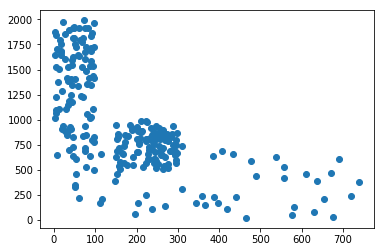

In [85]:
plt.scatter(X, Y)

In [86]:
def find_distance(x, y, cluster_x, cluster_y):
    """
        finds distance between (x,y) and cluster(cx, cy)
    """
    return np.sqrt(np.square(cluster_x - x) + np.square(y - cluster_y))

In [92]:
def assign_clusters(X, Y, clusters):
    assigned_clusters = np.zeros(X.shape[0])
    for i in range(0, X.shape[0]):
        assigned = False
        min_distance = 0
        cluster = 0
        for j in range(clusters.shape[0]):
            distance = find_distance(X[i], Y[i], clusters[j][0], clusters[j][1])
            if(distance < min_distance or (assigned == False)):
                min_distance = distance
                assigned = True
                cluster = j
        assigned_clusters[i] = cluster
    return assigned_clusters

In [95]:
assign_clusters(X, Y, np.array([[100, 1500], [400, 500]]))

array([ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1

In [204]:
def update_clusters(X, Y, clusters, assigned_clusters):
    """
        Used to update cluster centers
    """
    X_sum = np.zeros(clusters.shape[0])
    Y_sum = np.zeros(clusters.shape[0])
    total = np.ones(clusters.shape[0])
    for k in range(clusters.shape[0]):
        for i in range(X.shape[0]):
            X_sum[int(assigned_clusters[i])] += X[i]
            Y_sum[int(assigned_clusters[i])] += Y[i]
            total[int(assigned_clusters[i])] += 1
        clusters[:, 0] = np.divide(X_sum, total)
        clusters[:, 1] = np.divide(Y_sum, total)
    return clusters

In [205]:
def K_means(X, Y, clusters, iterations = 1000):
    for i in range(iterations):
        assigned_clusters = assign_clusters(X, Y, clusters)
        clusters = update_clusters(X, Y, clusters, assigned_clusters)
    return assigned_clusters, clusters

In [206]:
clusters = np.array([[100, 1500], [100, 500], [100, 1250]])
as_clus, clusters = K_means(X, Y, clusters, iterations=100)

In [207]:
def plot_clusters(X, Y, assigned_clusters, clusters, colors = ['r', 'b', 'g', 'c', 'y', 'w', 'm', '#12FF34']):
    for i in range(X.shape[0]):
        plt.scatter(X[i], Y[i], color = colors[(int)(assigned_clusters[i])])
    for i in range(clusters.shape[0]):
        plt.scatter(clusters[i,0], clusters[i,1], color = 'black', marker='*',s=50, label="Cluster")
    plt.legend()

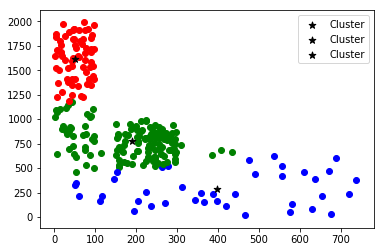

In [208]:
plot_clusters(X, Y, assigned_clusters=as_clus, clusters=clusters)

In [209]:
def K_means_complete(X, Y, clusters, iterations = 100, colors = ['r', 'b', 'g', 'c', 'y', 'w', 'm', '#12FF34']):
    as_clus, clusters = K_means(X, Y, clusters, iterations=iterations)
    plot_clusters(X, Y, assigned_clusters=as_clus, clusters=clusters, colors=colors)

## 3 Clusters

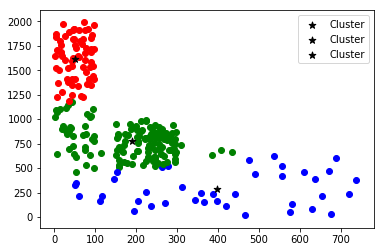

In [210]:
clusters = np.array([[100, 1500], [100, 500], [100, 1250]])
K_means_complete(X, Y, clusters)

## 4 Clusters

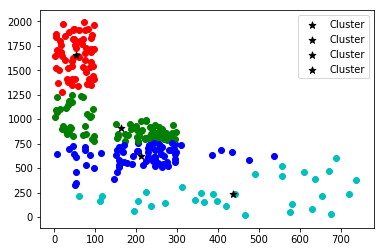

In [211]:
clusters = np.array([[100, 1500], [100, 500], [100, 1250], [700, 750]])
K_means_complete(X, Y, clusters)

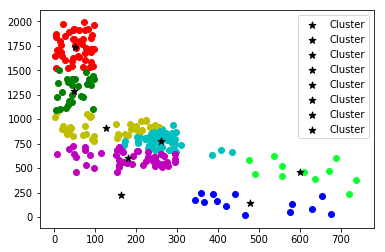

In [212]:
clusters = np.array([[100, 1500], [100, 500], [100, 1250], 
                     [250, 750], [300, 1200], [50, 500], 
                     [100, 600], [700, 900]])
K_means_complete(X, Y, clusters)